### 1. Introduction

##### 1.1. Executive Summary
Tidak meratanya permintaan dan penawaran atas jasa layanan yellow taxi di kota New York menjadi permasalahan bagi New York City Taxi and Limousine Commission (TLC) sebagai otoritas yang menjalankan operas. Berdasarkan analisa yang telah dilakukan, berikut adalah rangkumannya:
1. Ketidakseimbangan permintaan penawaran terjadi pada Borough yang ada di kota New York, adapun pelayanan masih berpuasat pada area Manhattan, sementara pada area EWR dan Staten Island sangat rendah. Berdasarkan hasil dari investigasi, tingginya rata-rata fare amount pada suatu Borough menyebabkan rendahnya jumlah driver disana.
    - Tingginya fare amount pada Borough tertentu diduga dipengaruhi oleh jauhnya trip_distance untuk setiap tripnya.
    - Semakin jauhnya trip_distance maka akan semakin besar juga biaya yang harus dikeluarkan oleh penunmpang untuk membayar uang toll.
    - Tingginya uang toll dan fare amount menyebabkan tingginya biaya yang harus ditanggung oleh penunmpang dalam sekali perjalanan.
2. Berikut adalah beberapa saran yang dapat dilakukan oleh TLC untuk kebijakan jangka pendek:
    - Mendistribusikan sebagian taxi yang beroperasi di Borough Manhattan ke Borough yang lain (khususnya Staten Island dan EWR) agar menjaga keseimbangan permintaan dan penawaran untuk masing-masing Borough. Dengan semakin banyaknya taxi di daerah Staten Island dan EWR, maka fare amount dapat ditekan, sehingga akan lebih menarik bagi calon driver untuk menggunakan jasa yellow taxi.
    - Solusi potensial lainnya adalah menerapkan program insentif bagi driver. Hal ini dapat melibatkan pemberian bonus atau insentif lain kepada driver yang secara konsisten melayani wilayah kota yang kurang terlayani. Ini dapat membantu mendorong lebih banyak driver untuk melayani daerah-daerah ini dan membantu mendistribusikan layanan Yellow Taxi secara merata ke seluruh kota.
    - Meluncurkan kampanye pemasaran untuk mempromosikan layanan yellow taxi dapat membantu meningkatkan permintaan dan mendorong lebih banyak penumpang untuk menggunakan layanan ini di area kota yang kurang terlayani.
4. Berikut adalah dashboard visualisasi data interaktif untuk mempermudah user dalam memahami hasil analisis. [https://datastudio.google.com/u/2/reporting/68b4846d-e941-40fb-b224-795f0fe3e728/page/LxjAD]

##### 1.2. Latar Belakang

Mayoritas warga New York bergantung kepada layanan transportasi publik atau layanan taksi. Hanya 22% dari penduduk Manhattan memiliki mobil jika dibandingkan dengan rata-rata 91% rumah tangga di seluruh Amerika Serikat memiliki setidaknya satu mobil. Layanan taksi di New York merupakan jaringan transportasi terbesar keempat di Amerika Serikat. Sistem tersebut diatur oleh New York City Taxi and Limousine Commission (TLC), yang mengawasi yellow taxi, taksi sewaan, mobil commuter, kendaraan transit, dan limosin tertentu. Terlepas dari jaringannya yang besar, sistem yang ada sekarang tidak melayani daerah (boroughs) secara merata. Karena hal tersebut, penduduk lebih memilih layanan taksi ilegal yang memiliki akses dan tarif yang tidak konsisten.

Pada report analisa ini akan dilakukan suatu investigasi mengapa terjadi ketidak seimbangan permintaan dan penawaran antar Borough, serta rekomendasi untuk TLC dalam menanggulangi permasalahan ini kedepannya.

##### 1.2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load taxi data
df = pq.read_table(r"C:\Data Analytics Project\Seleksi DSLS\yellow_tripdata_2021-09.parquet").to_pandas()

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,16.0,0.5,0.5,2.00,0.00,0.3,21.80,2.5,0.0
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.0
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.0
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,21.0,3.0,0.5,0.00,6.55,0.3,31.35,2.5,0.0
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0,2.32,1.0,N,75,238,2,10.5,0.5,0.5,0.00,0.00,0.3,11.80,0.0,0.0


In [4]:
lookup = pd.read_csv(r"C:\Data Analytics Project\Seleksi DSLS\taxi+_zone_lookup.csv")

In [5]:
lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


### 2. Data Preprocessing

##### 2.1. Join Dataset

In [6]:
# Merge dataset (PU)
new_df = pd.merge(df, lookup, left_on="PULocationID", right_on="LocationID")

In [7]:
new_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,LocationID,Borough,Zone,service_zone
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,...,2.00,0.0,0.3,21.80,2.5,0.0,87,Manhattan,Financial District North,Yellow Zone
1,2,2021-09-01 00:19:31,2021-09-01 00:34:37,3.0,4.44,1.0,N,87,234,1,...,3.96,0.0,0.3,23.76,2.5,0.0,87,Manhattan,Financial District North,Yellow Zone
2,1,2021-09-01 00:25:33,2021-09-01 01:04:22,1.0,16.40,1.0,N,87,29,1,...,5.00,0.0,0.3,58.80,2.5,0.0,87,Manhattan,Financial District North,Yellow Zone
3,2,2021-09-01 00:47:57,2021-09-01 01:08:06,5.0,9.84,1.0,N,87,22,1,...,5.00,0.0,0.3,37.80,2.5,0.0,87,Manhattan,Financial District North,Yellow Zone
4,2,2021-09-01 00:16:53,2021-09-01 00:37:26,1.0,7.63,1.0,N,87,263,1,...,2.80,0.0,0.3,30.60,2.5,0.0,87,Manhattan,Financial District North,Yellow Zone


In [8]:
new_df = new_df.drop("LocationID", axis=1)
new_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Borough,Zone,service_zone
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,...,0.5,2.00,0.0,0.3,21.80,2.5,0.0,Manhattan,Financial District North,Yellow Zone
1,2,2021-09-01 00:19:31,2021-09-01 00:34:37,3.0,4.44,1.0,N,87,234,1,...,0.5,3.96,0.0,0.3,23.76,2.5,0.0,Manhattan,Financial District North,Yellow Zone
2,1,2021-09-01 00:25:33,2021-09-01 01:04:22,1.0,16.40,1.0,N,87,29,1,...,0.5,5.00,0.0,0.3,58.80,2.5,0.0,Manhattan,Financial District North,Yellow Zone
3,2,2021-09-01 00:47:57,2021-09-01 01:08:06,5.0,9.84,1.0,N,87,22,1,...,0.5,5.00,0.0,0.3,37.80,2.5,0.0,Manhattan,Financial District North,Yellow Zone
4,2,2021-09-01 00:16:53,2021-09-01 00:37:26,1.0,7.63,1.0,N,87,263,1,...,0.5,2.80,0.0,0.3,30.60,2.5,0.0,Manhattan,Financial District North,Yellow Zone


In [9]:
new_df = new_df.rename(columns={'Borough':'PU_Borough',
                                'Zone':'PU_Zone', 
                                'service_zone':'PU_service_zone'})

In [10]:
# Merge Dataset (DO)

new_df = pd.merge(new_df, lookup, left_on="DOLocationID", right_on="LocationID")

In [11]:
new_df = new_df.drop("LocationID", axis=1)

In [12]:
new_df = new_df.rename(columns={'Borough':'DO_Borough',
                                'Zone':'DO_Zone', 
                                'service_zone':'DO_service_zone'})

In [13]:
new_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'PU_Borough',
       'PU_Zone', 'PU_service_zone', 'DO_Borough', 'DO_Zone',
       'DO_service_zone'],
      dtype='object')

In [14]:
# Inspect new df view
new_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,...,0.3,21.80,2.5,0.0,Manhattan,Financial District North,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone
1,2,2021-09-01 07:50:57,2021-09-01 08:05:50,1.0,5.62,1.0,N,87,229,1,...,0.3,25.56,2.5,0.0,Manhattan,Financial District North,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone
2,2,2021-09-01 08:40:25,2021-09-01 08:57:03,1.0,5.98,1.0,N,87,229,1,...,0.3,24.30,2.5,0.0,Manhattan,Financial District North,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone
3,2,2021-09-01 13:16:32,2021-09-01 13:30:06,1.0,6.18,1.0,N,87,229,1,...,0.3,27.88,2.5,0.0,Manhattan,Financial District North,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone
4,2,2021-09-01 14:50:59,2021-09-01 15:02:57,2.0,4.98,1.0,N,87,229,2,...,0.3,19.30,2.5,0.0,Manhattan,Financial District North,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone


##### 2.2. Inspect Dataset Info, Data Types, and Summary Statistics

In [15]:
# Inspect dataset info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2963793 entries, 0 to 2963792
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Ada beberapa kolom dengan tipe data yang kurang sesuai, seperti kolom pada nomor 19-24 di atas perlu dikonversi menjadi tipe data kategori.

In [16]:
# Convert datatypes
new_df.PU_Borough = new_df.PU_Borough.astype("category")
new_df.PU_Zone = new_df.PU_Zone.astype("category")
new_df.PU_service_zone = new_df.PU_service_zone.astype("category")
new_df.DO_Borough = new_df.DO_Borough.astype("category")
new_df.DO_Zone = new_df.DO_Zone.astype("category")
new_df.DO_service_zone = new_df.DO_service_zone.astype("category")

In [17]:
# Inspecting new_df info after converting
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2963793 entries, 0 to 2963792
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [18]:
# Inspecting missing values
new_df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          142854
trip_distance                 0
RatecodeID               142854
store_and_fwd_flag       142854
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     142854
airport_fee              142854
PU_Borough                    0
PU_Zone                   13781
PU_service_zone           35694
DO_Borough                    0
DO_Zone                    9556
DO_service_zone           27828
dtype: int64

Ada beberapa kolom yang mempunyai jumlah missing values yang sama, ini perlu di drop agar tidak mengganggu proses analisis kedepannya.

In [19]:
# Drop missing values
new_df = new_df.dropna()

In [20]:
new_df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
PU_Borough               0
PU_Zone                  0
PU_service_zone          0
DO_Borough               0
DO_Zone                  0
DO_service_zone          0
dtype: int64

Sudah tidak ada missing values di dalam dataset.

In [21]:
# Inspect duplicated data
new_df.duplicated().sum()

0

Tidak ada duplikasi data di dalam dataset.

In [22]:
# Convert numerical data to right type
new_df["VendorID"] = new_df["VendorID"].astype("category")
new_df["passenger_count"] = new_df["passenger_count"].astype("int")
new_df["PULocationID"] = new_df["PULocationID"].astype("category")
new_df["store_and_fwd_flag"] = new_df["store_and_fwd_flag"].astype("category")
new_df["DOLocationID"] = new_df["DOLocationID"].astype("category")
new_df["RatecodeID"] = new_df["RatecodeID"].astype("category")
new_df["payment_type"] = new_df["payment_type"].astype("category") 

In [23]:
# Inspect summary statistics for numerical data
new_df.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.782747e+06,2.782747e+06,2.782747e+06,2.782747e+06,2.782747e+06,2.782747e+06,2.782747e+06,2.782747e+06,2.782747e+06,2.782747e+06,2.782747e+06
mean,1.424437e+00,3.171425e+00,1.361731e+01,1.070533e+00,4.930129e-01,2.451803e+00,3.858735e-01,2.973665e-01,1.997085e+01,2.308954e+00,7.642897e-02
std,1.026986e+00,4.325954e+00,4.906575e+02,1.252561e+00,7.449633e-02,2.783582e+00,1.659256e+00,3.940883e-02,4.907330e+02,6.961927e-01,3.013339e-01
min,0.000000e+00,0.000000e+00,-4.740000e+02,-4.500000e+00,-5.000000e-01,-9.860000e+01,-4.125000e+01,-3.000000e-01,-4.765500e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.100000e+00,7.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.180000e+01,2.500000e+00,0.000000e+00
50%,1.000000e+00,1.830000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.050000e+00,0.000000e+00,3.000000e-01,1.535000e+01,2.500000e+00,0.000000e+00
75%,1.000000e+00,3.290000e+00,1.500000e+01,2.500000e+00,5.000000e-01,3.160000e+00,0.000000e+00,3.000000e-01,2.135000e+01,2.500000e+00,0.000000e+00
max,9.000000e+00,7.915400e+02,8.182834e+05,9.000000e+00,3.300000e+00,3.333300e+02,9.600000e+01,3.000000e-01,8.182867e+05,2.750000e+00,1.250000e+00


Pada baris [min], terdapat beberapa kolom yang mempunyai nilai minimum di angka minus, perlu diinvestigasi lebih lanjut karena angka minus tidak logis di dalam data-data transaksi.

In [24]:
# Inspect summary statistics for categorical data
new_df.describe(include=["category"])

,VendorID,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
count,2782747,2782747.0,2782747,2782747,2782747,2782747,2782747,2782747,2782747,2782747,2782747,2782747
unique,2,7.0,2,257,258,4,6,256,4,6,257,4
top,2,1.0,N,237,236,1,Manhattan,Upper East Side South,Yellow Zone,Manhattan,Upper East Side North,Yellow Zone
freq,1932917,2690306.0,2748820,140410,126177,2151836,2556281,140410,2478758,2517854,126177,2363665


In [25]:
# Add RateCategory column
def rate_condition(x):
    if x == 1:
        return "Standard rate"
    elif x == 2:
        return "JFK"
    elif x == 3:
        return "Newark"
    elif x == 4:
        return "Nassau or Westchester"
    elif x == 5:
        return "Negotiated fare"
    else:
        return "Group ride"
    
new_df["RateCategory"] = new_df["RatecodeID"].apply(rate_condition)

In [26]:
# Add payment_type column
def payment_condition(x):
    if x==1:
        return "Credit card"
    elif x==2:
        return "Cash"
    elif x==3:
        return "No charge"
    elif x==4:
        return "Dispute"
    elif x==5:
        return "Unknown"
    else:
        return "Vioded trip"

# Apply the condition
new_df["Payment_Type"] = new_df["payment_type"].apply(payment_condition)

In [27]:
# Add vendor column
def vendor(x):
    if x==1:
        return " Creative Mobile Technologies, LLC"
    else:
        return "VeriFone Inc."

# Apply the condition
new_df["Vendor"] = new_df["VendorID"].apply(vendor)

In [28]:
new_df.drop("payment_type", axis=1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,RateCategory,Payment_Type,Vendor
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2,4.90,1.0,N,87,229,16.0,...,0.00,Manhattan,Financial District North,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Standard rate,Credit card,VeriFone Inc.
1,2,2021-09-01 07:50:57,2021-09-01 08:05:50,1,5.62,1.0,N,87,229,18.0,...,0.00,Manhattan,Financial District North,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Standard rate,Credit card,VeriFone Inc.
2,2,2021-09-01 08:40:25,2021-09-01 08:57:03,1,5.98,1.0,N,87,229,19.0,...,0.00,Manhattan,Financial District North,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Standard rate,Credit card,VeriFone Inc.
3,2,2021-09-01 13:16:32,2021-09-01 13:30:06,1,6.18,1.0,N,87,229,19.0,...,0.00,Manhattan,Financial District North,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Standard rate,Credit card,VeriFone Inc.
4,2,2021-09-01 14:50:59,2021-09-01 15:02:57,2,4.98,1.0,N,87,229,16.0,...,0.00,Manhattan,Financial District North,Yellow Zone,Manhattan,Sutton Place/Turtle Bay North,Yellow Zone,Standard rate,Cash,VeriFone Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963785,2,2021-09-18 09:23:26,2021-09-18 09:36:10,3,2.73,1.0,N,118,176,11.5,...,0.00,Staten Island,Heartland Village/Todt Hill,Boro Zone,Staten Island,Oakwood,Boro Zone,Standard rate,Cash,VeriFone Inc.
2963787,2,2021-09-23 16:35:19,2021-09-23 18:32:10,1,32.73,1.0,N,200,176,105.0,...,0.00,Bronx,Riverdale/North Riverdale/Fieldston,Boro Zone,Staten Island,Oakwood,Boro Zone,Standard rate,Credit card,VeriFone Inc.
2963788,2,2021-09-25 03:27:08,2021-09-25 04:10:59,1,25.52,1.0,N,233,99,69.0,...,0.00,Manhattan,UN/Turtle Bay South,Yellow Zone,Staten Island,Freshkills Park,Boro Zone,Standard rate,Credit card,VeriFone Inc.
2963789,2,2021-09-01 17:47:43,2021-09-02 05:52:33,1,2.06,1.0,N,68,99,11.0,...,0.00,Manhattan,East Chelsea,Yellow Zone,Staten Island,Freshkills Park,Boro Zone,Standard rate,Cash,VeriFone Inc.


kolom payment_type didrop agar tidak ada kolom yang redundant. 

In [29]:
# new_df.to_csv("yellow_taxi_data.csv", index=False)

In [30]:
sample = new_df.groupby("PU_Borough", group_keys=False).apply(lambda x: x.sample(frac=0.15))

In [31]:
sample.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,417411.000000,417411.000000,417411.000000,417411.000000,417411.000000,417411.000000,417411.000000,417411.000000,417411.000000,417411.000000,417411.00000
mean,1.421146,3.165105,13.312357,1.070138,0.492943,2.454345,0.385402,0.297344,19.668868,2.309739,0.07631
std,1.023173,4.261470,11.428332,1.253747,0.074925,2.817026,1.652817,0.039566,14.384493,0.695133,0.30128
min,0.000000,0.000000,-300.000000,-4.500000,-0.500000,-98.600000,-16.750000,-0.300000,-308.100000,-2.500000,-1.25000
25%,1.000000,1.100000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,11.800000,2.500000,0.00000
50%,1.000000,1.830000,10.000000,0.500000,0.500000,2.060000,0.000000,0.300000,15.350000,2.500000,0.00000
75%,1.000000,3.290000,15.000000,2.500000,0.500000,3.160000,0.000000,0.300000,21.335000,2.500000,0.00000
max,9.000000,543.000000,380.000000,8.250000,3.300000,300.300000,66.610000,0.300000,382.800000,2.750000,1.25000


Pada baris min, ada beberapa numerical value yang mempunyai nilai minimal di angka minus, hal ini kurang relevan untuk dilakukan lebih lanjut dalam analisis. Oleh karena itu harus dilakukan drop out pada nilai di bawa angka 0.

In [32]:
# Drop numerical variable with value less than 0
sample = sample[(sample["fare_amount"] >=0) & (sample["extra"] >=0) & (sample["mta_tax"] >= 0) & (sample["tip_amount"] >= 0) & (sample["tolls_amount"] >= 0) & (sample["improvement_surcharge"] >= 0) & (sample["total_amount"] >= 0) & (sample["congestion_surcharge"] >= 0) & (sample["airport_fee"] >= 0)]

In [33]:
# Inspect summary statistics after drop minus value
sample.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,415611.000000,415611.000000,415611.000000,415611.000000,415611.000000,415611.000000,415611.00000,415611.000000,415611.000000,415611.000000,415611.000000
mean,1.421267,3.170712,13.423198,1.076310,0.497201,2.465112,0.38790,0.299931,19.822457,2.328533,0.077106
std,1.023781,4.263523,11.275236,1.252357,0.037596,2.812661,1.65405,0.004559,14.178923,0.631875,0.300729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.100000,7.000000,0.000000,0.500000,0.000000,0.00000,0.300000,11.800000,2.500000,0.000000
50%,1.000000,1.830000,10.000000,0.500000,0.500000,2.060000,0.00000,0.300000,15.360000,2.500000,0.000000
75%,1.000000,3.290000,15.000000,2.500000,0.500000,3.160000,0.00000,0.300000,21.350000,2.500000,0.000000
max,9.000000,543.000000,380.000000,8.250000,3.300000,300.300000,66.61000,0.300000,382.800000,2.750000,1.250000


Nilai min pada setiap kolom menunjukkan angka 0, berarti sudah tidak ada angka minus lagi untuk setiap kolomnya.

In [34]:
# Save dataset to csv file
# sample.to_csv("sample_nyc_taxi.csv", index=False)

### 3. Exploratory Data Analysis

##### Load Sample Dataset

In [35]:
sample_df = pd.read_csv(r"C:\Data Analytics Project\Seleksi DSLS\sample_nyc_taxi.csv")

In [36]:
sample_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,airport_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,RateCategory,Payment_Type,Vendor
0,1,2021-09-03 19:29:24,2021-09-03 19:38:53,0,1.5,1.0,N,69,74,2,...,0.0,Bronx,East Concourse/Concourse Village,Boro Zone,Manhattan,East Harlem North,Boro Zone,Standard rate,Cash,"Creative Mobile Technologies, LLC"
1,2,2021-09-18 04:34:18,2021-09-18 04:34:31,1,0.0,5.0,N,159,159,1,...,0.0,Bronx,Melrose South,Boro Zone,Bronx,Melrose South,Boro Zone,Negotiated fare,Credit card,VeriFone Inc.
2,2,2021-09-09 22:31:29,2021-09-09 22:32:09,1,0.0,5.0,N,136,136,1,...,0.0,Bronx,Kingsbridge Heights,Boro Zone,Bronx,Kingsbridge Heights,Boro Zone,Negotiated fare,Credit card,VeriFone Inc.
3,1,2021-09-04 08:30:48,2021-09-04 08:42:08,1,2.0,1.0,Y,168,247,2,...,0.0,Bronx,Mott Haven/Port Morris,Boro Zone,Bronx,West Concourse,Boro Zone,Standard rate,Cash,"Creative Mobile Technologies, LLC"
4,1,2021-09-12 22:40:27,2021-09-12 22:56:10,4,2.8,1.0,N,69,74,1,...,0.0,Bronx,East Concourse/Concourse Village,Boro Zone,Manhattan,East Harlem North,Boro Zone,Standard rate,Credit card,"Creative Mobile Technologies, LLC"


##### Check the number of passenger per borough

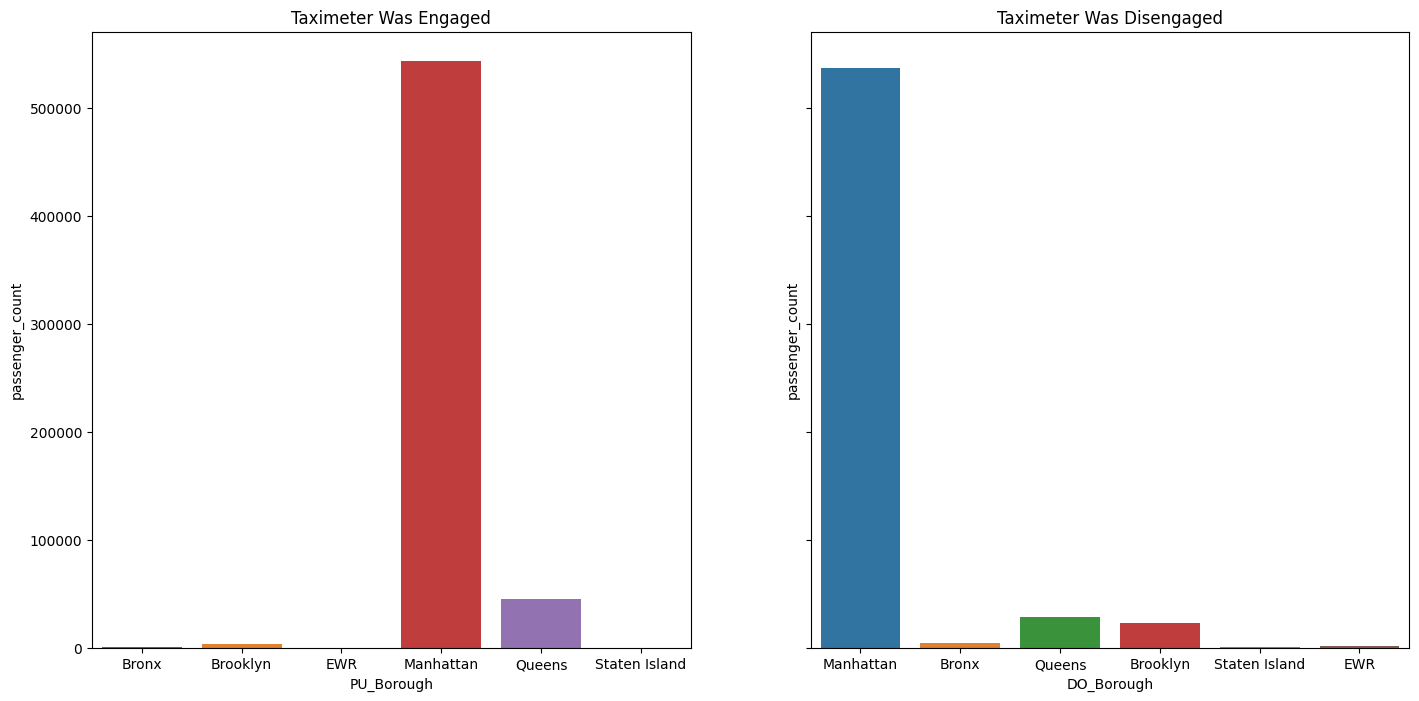

In [37]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(17,8))

sns.barplot(x="PU_Borough", y="passenger_count", data=sample_df, ci=None, estimator=sum, ax=ax[0]).set_title("Taximeter Was Engaged")
sns.barplot(x="DO_Borough", y="passenger_count", data=sample_df, ci=None, estimator=sum, ax=ax[1]).set_title("Taximeter Was Disengaged")
# plt.suptitle("Passenger Count per Borough", fontsize=16)
plt.show()

Dari chart di atas, kita dapat mengetahui bahwa pelayanan taksi masih berpusat pada borough Manhattan baik pada jenis Taximeter Was Engaged maupun Taximeter was Disengaged. Ketidak merataan ini perlu diselidiki penyebabnya lebih lanjut.

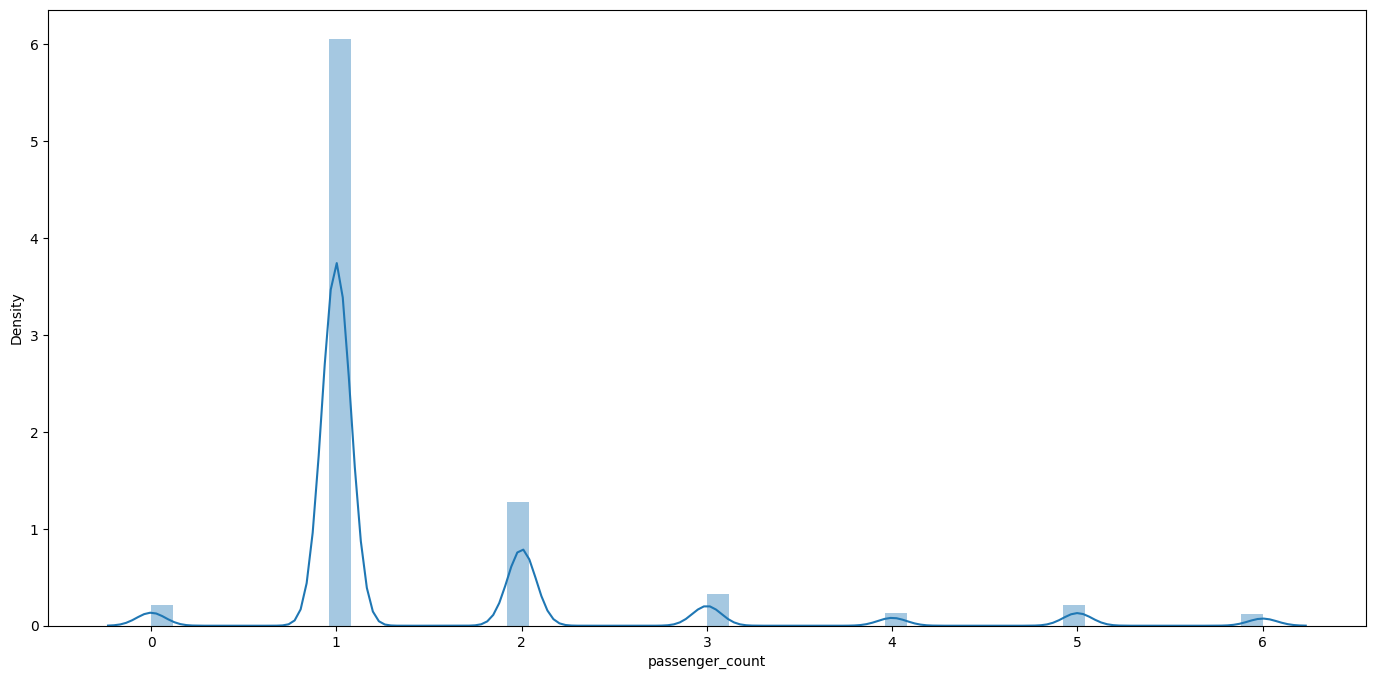

In [38]:
plt.figure(figsize=(17,8))
sns.distplot(sample_df["passenger_count"])
plt.show()

Rata-rata jumlah penumpang dalam satu kali perjalanan hanyalah 1 penumpang saja, sangat jarang sekali dijumpai jumlah penumpang lebih dari 3 dalam satu kali perjalanan. Ini menandakan bahwa penumpang kebanyakan menggunakan jasa layanan taxi secara individual atau kebutuhan pribadi.

##### Correlation Matrix Heatmap

Pada bagian ini, Saya ingin melakukan investigasi mengenai bagaimana korelasi antar features pada dataset ini.

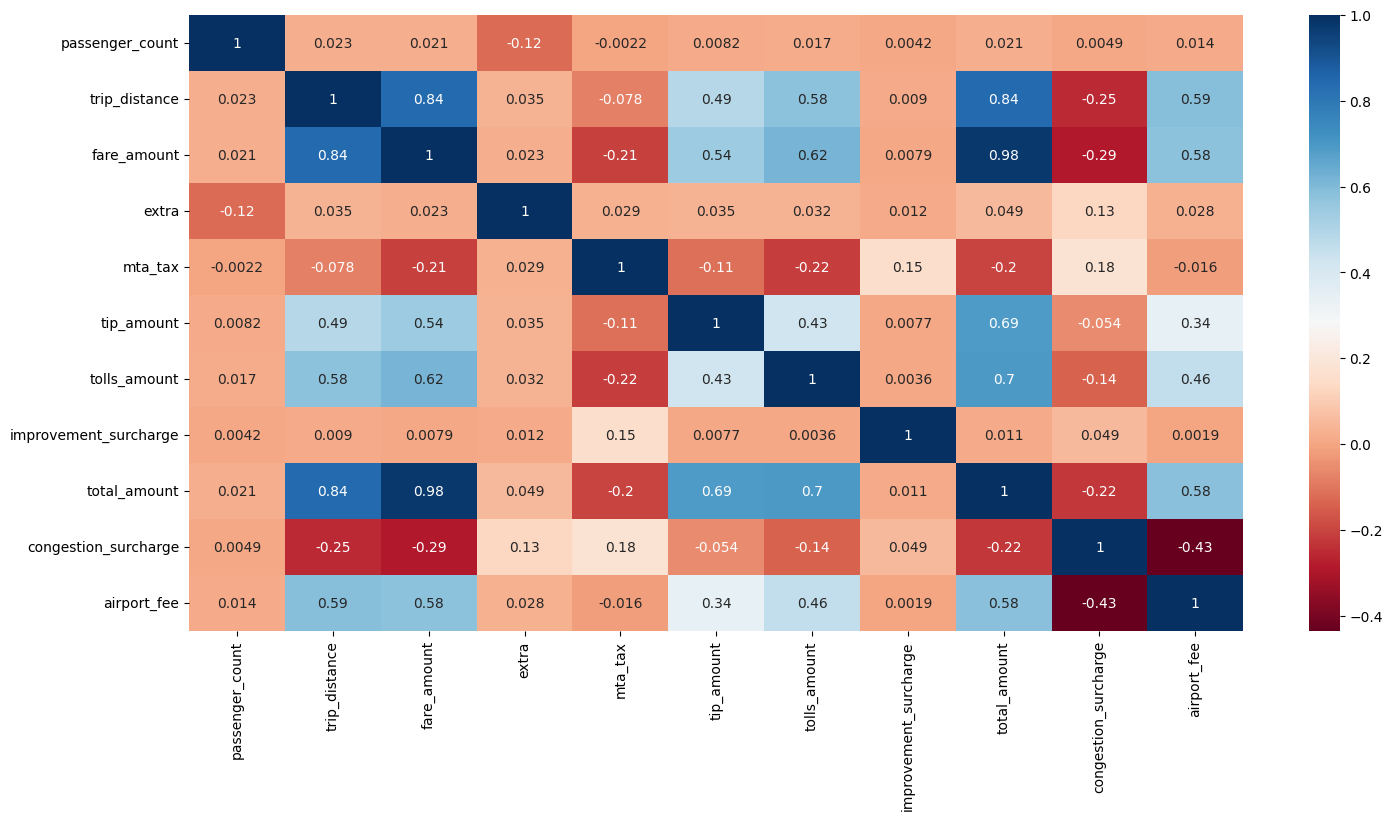

In [39]:
# Correlation Matrix of Sample dataset
plt.figure(figsize=(17,8))
sns.heatmap(sample.corr(), cmap="RdBu", annot=True)
plt.show()

Dari correleation matrix di atas dapat disimpulkan bahwa ada beberapa variabel yang mempunyai hubungan kuat, yakni:
- trip_distance - fare_amount : 0.83
- total_amount - fare_amount : 0.98
- tolls_amount - fare_amount: 0.61

##### Fare Amount per Borough

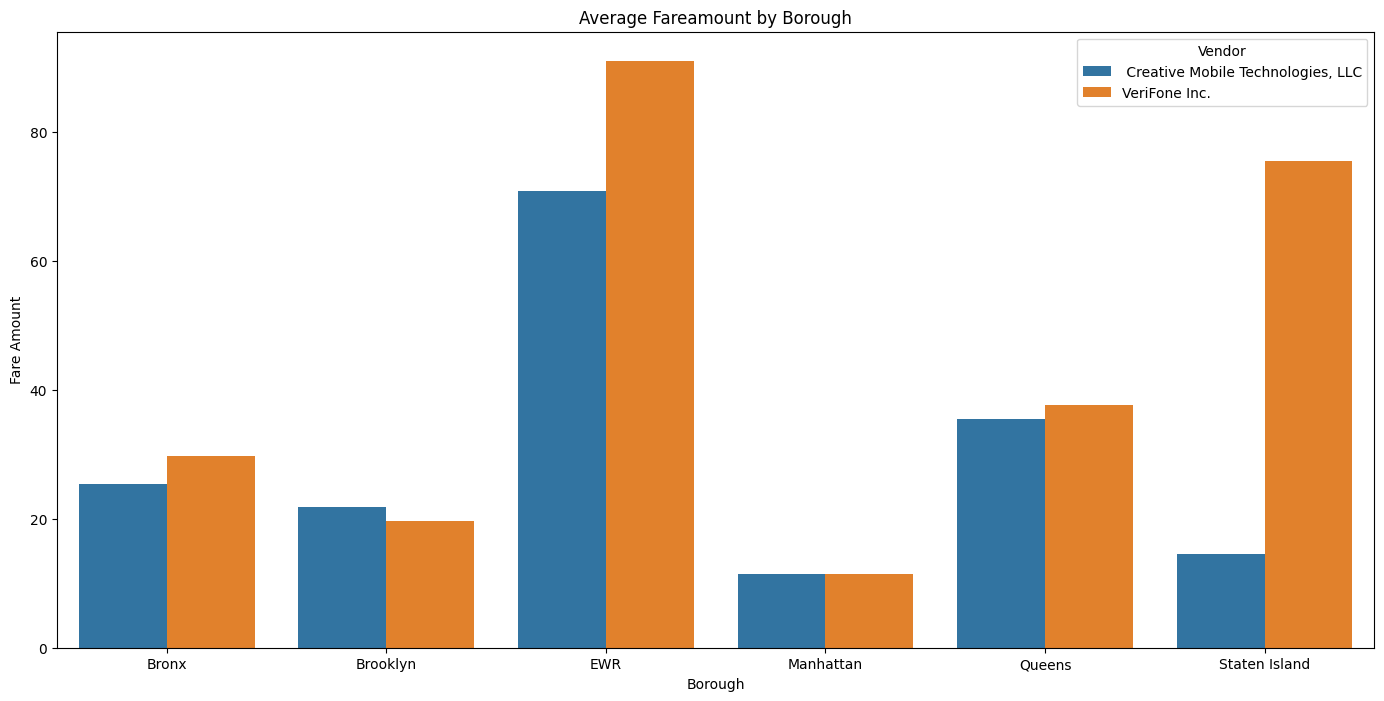

In [40]:
plt.figure(figsize=(17,8))
sns.barplot(x="PU_Borough", y="fare_amount", hue="Vendor", data=sample_df, ci=None)
plt.xlabel("Borough")
plt.ylabel("Fare Amount")
plt.title("Average Fareamount by Borough")
plt.show()

Observasi:
- Borough EWR dan Staten Island mempunyai average fare amount yang tinggi untuk setiap tripnya, hal ini berkorelasi dengan rendahnya jumlah passenger di kedua borough ini.
- Borough Manhattan yang mempunyai jumlah passenger tertinggi adalah daerah dengan average amount terendah.
- Sejauh ini data jumlah penumpang berbanding terbalik dengan average fare amount.
- Average fare amount dari kedua vendor dalah mirip untuk masing-masing borough, terkhusus di Staten Island hanya terdapat layanan dari Verifone Inc.

##### Fare Amount vs (Total Amount, Tolls Amount, dan Trip Distance)

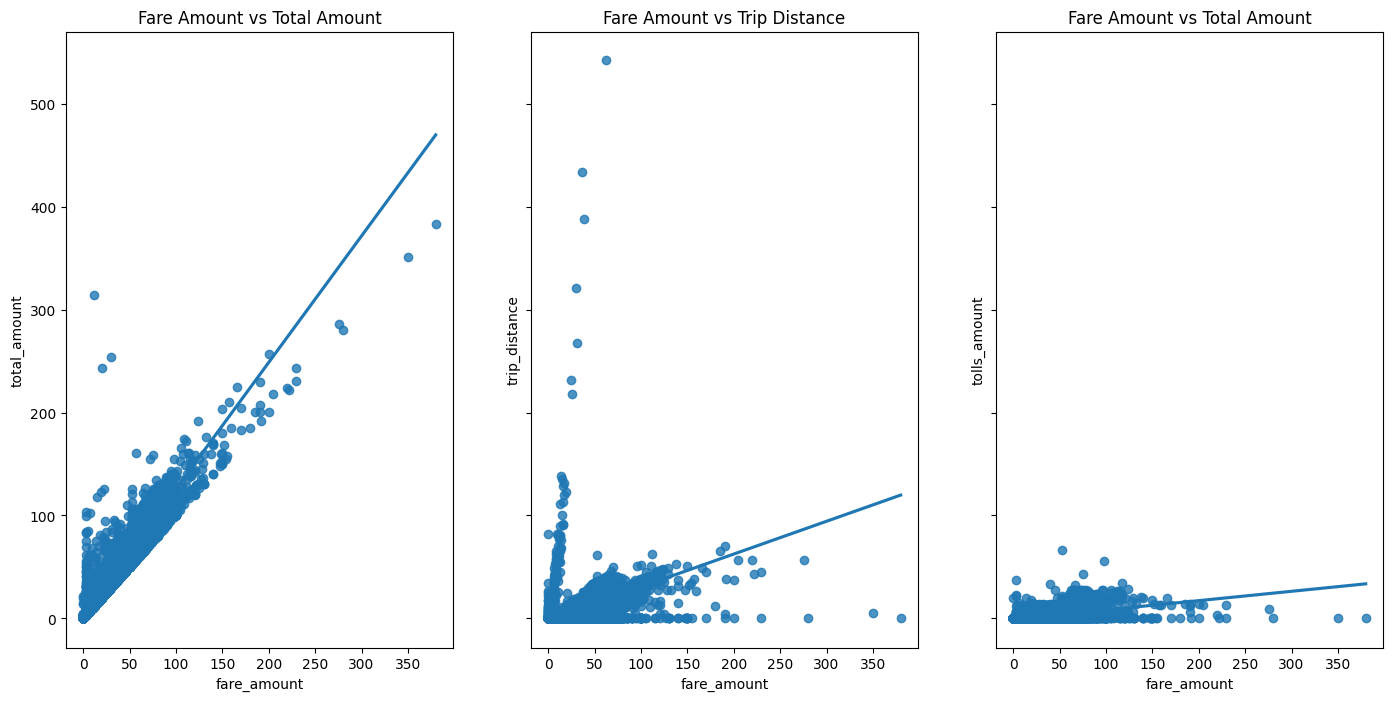

In [41]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(17,8))
sns.regplot(data=sample, x="fare_amount", y="total_amount", ax=ax[0]).set_title("Fare Amount vs Total Amount")
sns.regplot(data=sample, x="fare_amount", y="trip_distance", ax=ax[1]).set_title("Fare Amount vs Trip Distance")
sns.regplot(data=sample, x="fare_amount", y="tolls_amount", ax=ax[2]).set_title("Fare Amount vs Total Amount")
# plt.suptitle("Fare Amount Correlation", fontsize=16)
plt.show()

Observasi:
- Tingginya fare amount pada Borough tertentu diduga dipengaruhi oleh jauhnya trip_distance untuk setiap tripnya.
- Semakin jauhnya trip_distance maka akan semakin besar juga biaya yang harus dikeluarkan oleh passenger untuk membayar uang toll.
- Tingginya uang toll dan fare amount menyebabkan tingginya biaya yang harus ditanggung oleh passenger dalam sekali perjalanan.
- Fenomena ini diduga menjadi penyebab rendahnya peminat Yellow Taxi pada Borough tertentu.

In [42]:
sample_df.groupby(["PU_Zone", "PU_Borough"])[["fare_amount", "total_amount", "tolls_amount"]].mean().sort_values(by="fare_amount", ascending=False).nlargest(5, "fare_amount").reset_index()

,PU_Zone,PU_Borough,fare_amount,total_amount,tolls_amount
0,Freshkills Park,Staten Island,101.000000,108.350000,6.550000
1,Charleston/Tottenville,Staten Island,88.289474,98.431579,9.157895
2,Newark Airport,EWR,86.330513,103.688462,5.551282
3,Arrochar/Fort Wadsworth,Staten Island,73.000000,94.450000,19.650000
4,Arden Heights,Staten Island,71.000000,78.850000,6.550000


Tabel di atas mendukung hasil observasi sebelumnya bahwa pada top 5 Zona dan Borough dengan fare amount tertinggi diisi oleh Staten Island dan EWR, yang mana kedua Borough tersebut adalah daerah dengan passenger paling rendah.

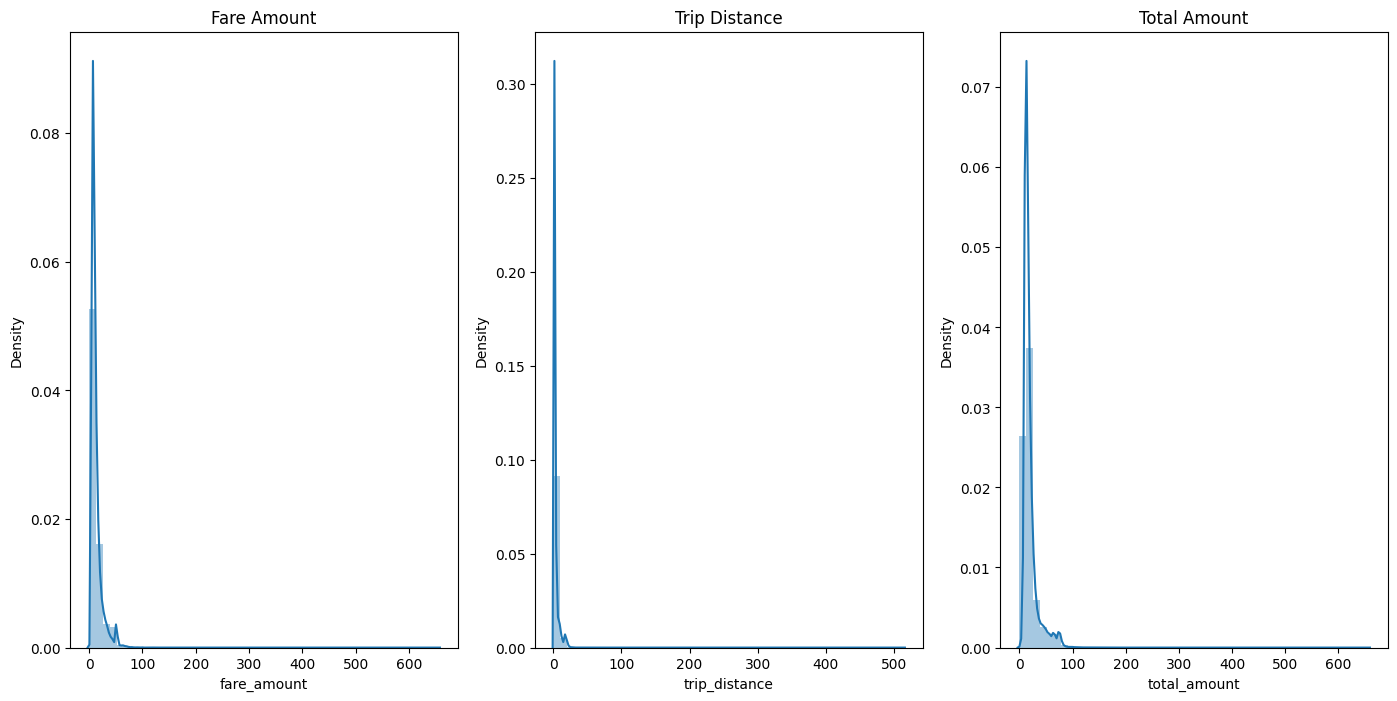

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(17,8))
sns.distplot(sample_df["fare_amount"], ax=ax[0]).set_title("Fare Amount")
sns.distplot(sample_df["trip_distance"], ax=ax[1]).set_title("Trip Distance")
sns.distplot(sample_df["total_amount"], ax=ax[2]).set_title("Total Amount")
plt.show()

##### Trip Distance per Borough

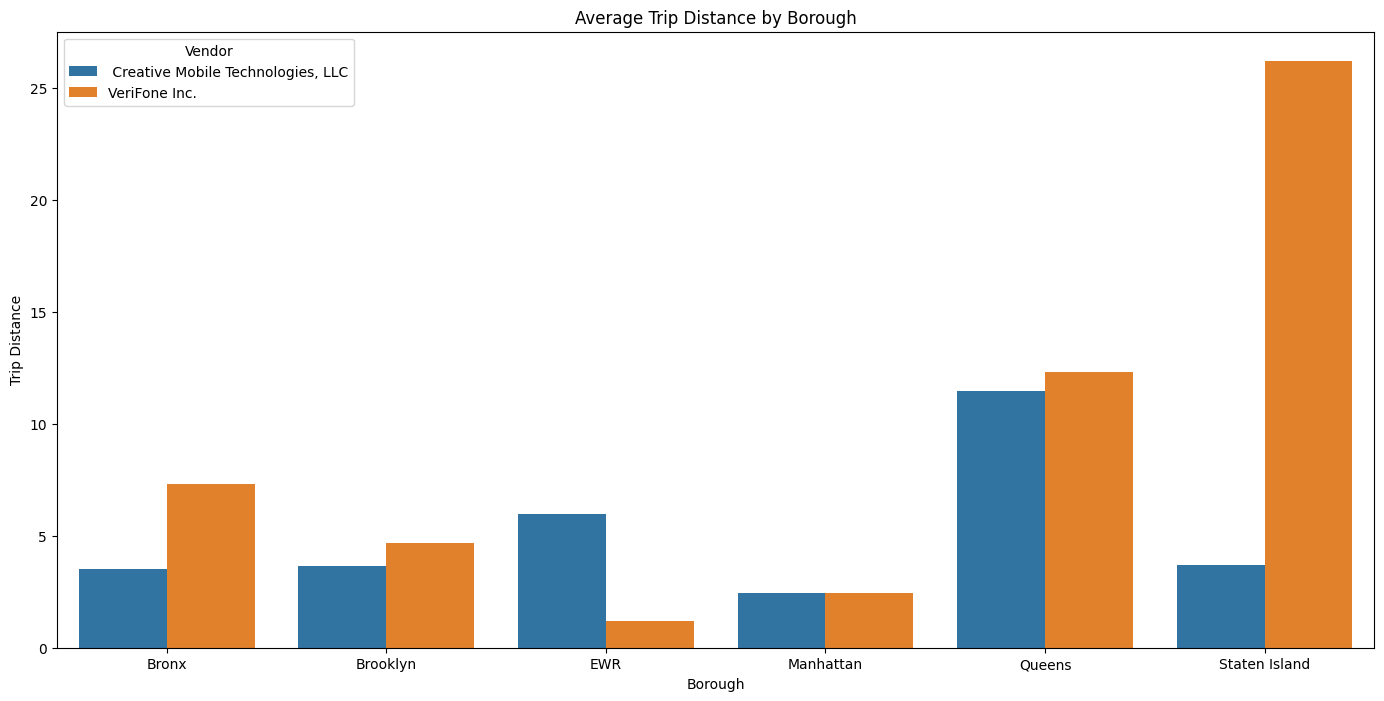

In [44]:
plt.figure(figsize=(17,8))
sns.barplot(x="PU_Borough", y="trip_distance", hue="Vendor", data=sample_df, ci=None)
plt.xlabel("Borough")
plt.ylabel("Trip Distance")
plt.title("Average Trip Distance by Borough")
plt.show()

Observasi:
- Borough Manhattan mempunyai rata-rata Trip Distance yang paling rendah dibanding Borough lain, ini sejalan dengan banyaknya pengguna layanan TLC disana.
- Borough Staten Island mempunyai rata-rata Trip Distance tertinggi dibandingkan dengan Borough lain, bahkan mencapai 20 km per sekali trip, ini adalah angka yang relatif sangat tinggi.

##### Rata-rata Fare Amount per Hari

In [45]:
sample_df['tpep_pickup_datetime'] = sample_df['tpep_pickup_datetime'].astype("datetime64[ns]")

In [46]:
sample_df["day"] = sample_df['tpep_pickup_datetime'].dt.day_name()

In [47]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_fare_amount = sample_df.groupby("day")["fare_amount"].mean().reindex(cats).reset_index()

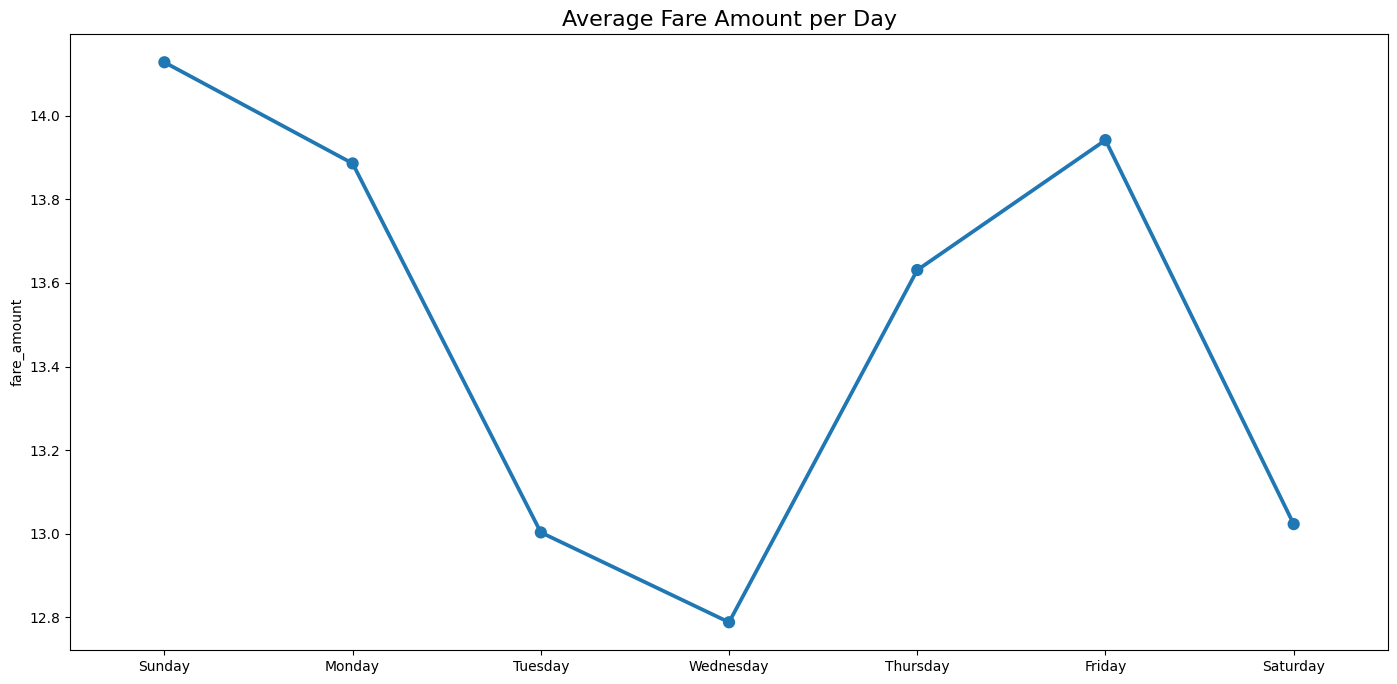

In [48]:
plt.figure(figsize=(17,8))
sns.pointplot(x="day", y="fare_amount", data=day_fare_amount)
plt.title("Average Fare Amount per Day", fontsize=16)
plt.xlabel("")
plt.show()

Observasi:
- Dari chart di atas dapat diketahui bahwa average fare amount akan tinggi pada hari senin, jumat, dan minggu.
- Peningkatan yang signifikan pada hari tersebut diduga karena tingginya permintaan pada karena mobilitas orang yang bekerja, yaitu berangkat pada hari senin dan pulang hari jumat, serta liburan di hari minggu.

##### Rata-rata Trip Distance per Hari

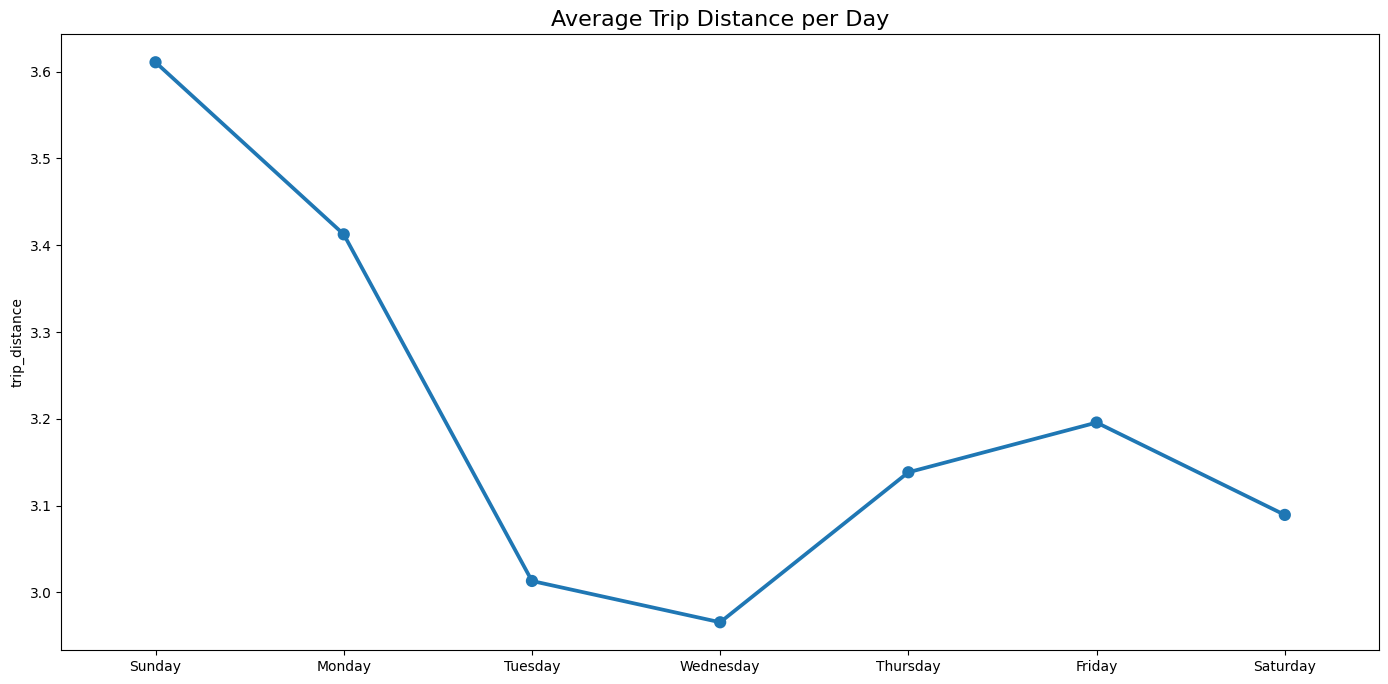

In [49]:
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_trip_distance = sample_df.groupby("day")["trip_distance"].mean().reindex(cats).reset_index()
plt.figure(figsize=(17,8))
sns.pointplot(x="day", y="trip_distance", data=day_trip_distance)
plt.title("Average Trip Distance per Day", fontsize=16)
plt.xlabel("")
plt.show()

Pola dari chart di atas mengkonfirmasi temuan pada chart sebelumnya (average fare amount per day), dimana seseorang akan melakukan perjalanan jauh pada hari minggu (untuk liburan) dan hari senin (untuk berangkat ke lokasi kerja).

##### Pickup Berdasarkan Jam dan Hari

In [50]:
sample_df["hour"] = sample_df["tpep_pickup_datetime"].dt.hour
sample_df["weekday_num"] = sample["tpep_pickup_datetime"].dt.weekday.astype("int")

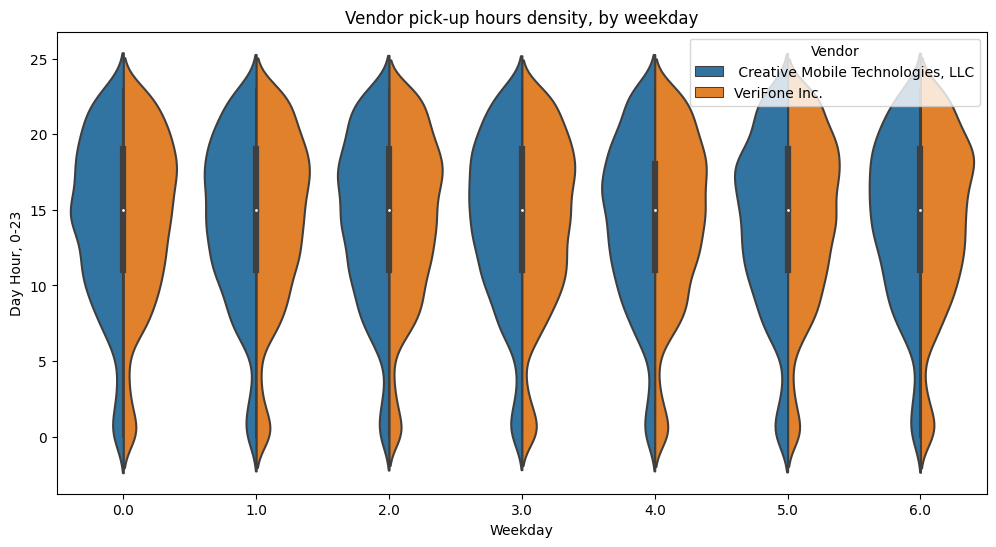

In [51]:
plt.figure(figsize=(12,6))
sns.violinplot(x="weekday_num",
               y="hour",
               data=sample_df,
               hue="Vendor",
               split=True)
plt.title('Vendor pick-up hours density, by weekday')
plt.xlabel('Weekday') ; plt.ylabel('Day Hour, 0-23')
pass

Berdasarkan chart di atas, distribusi banyaknya penumpang mempunyai profil yang mirip untuk setiap harinya. Adapun peningkatan jumlah penumpang dimulai sejak jam 5.00 pagi, dan mencapai puncaknya pada sekitar pukul 15.00 dan 19.00.

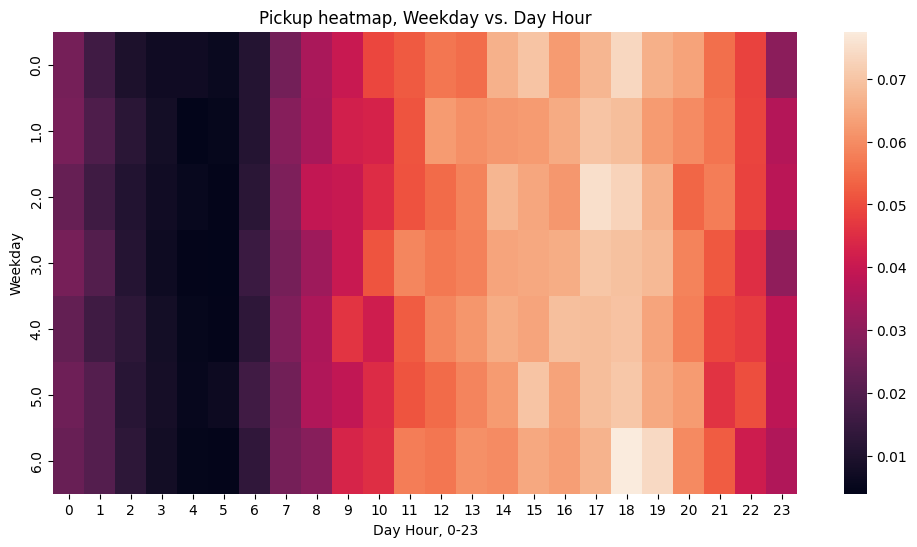

In [52]:
plt.figure(figsize=(12,6))
sns.heatmap(data=pd.crosstab(sample_df["weekday_num"],
                             sample_df["hour"],
                             values=sample_df['passenger_count'],
                             aggfunc="sum",
                             normalize='index'))
plt.title('Pickup heatmap, Weekday vs. Day Hour')
plt.ylabel('Weekday') ; plt.xlabel('Day Hour, 0-23')
pass

Heatmap di atas menunjukkan gambaran lebih jelas mengenai distribusi density banyaknya pickup penumpang, yang mana pada jam 15.00 hingga 19.00 adalah puncaknya.

##### Vendor Pickup by Borough

<Figure size 1700x800 with 0 Axes>

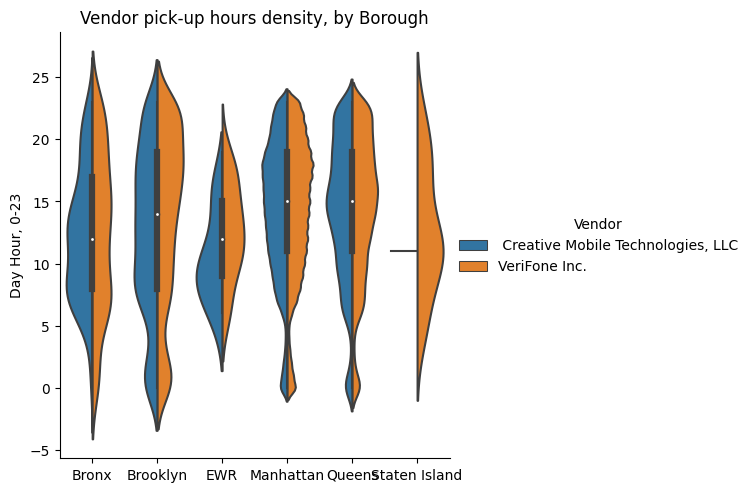

In [53]:
plt.figure(figsize=(17,8))
sns.catplot(x="PU_Borough",
               y="hour",
               data=sample_df,
               hue="Vendor",
               kind="violin",
               split=True)
plt.title('Vendor pick-up hours density, by Borough')
plt.xlabel('') ; plt.ylabel('Day Hour, 0-23')
# plt.legend(loc="upper right")
pass

Observasi:
- Borough Manhattan, Brooklyn, dan Queens mempunyai distribusi yang konsisten untuk pickup penumpang dalam sepanjang hari.
- Pada Borough Staten Island hanya terdapat 1 vendor saja yang menyediakan layanan
- Pada Borough EWR rentang waktu pickup penumpang relatif lebih pendek dibanding Borough lain.

##### Payment Type

Text(0, 0.5, '')

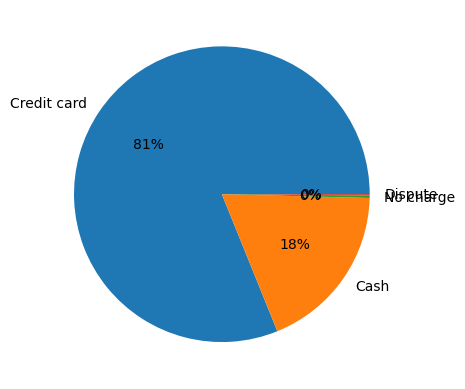

In [65]:
sample_df.groupby("Payment_Type")["total_amount"].sum().sort_values(ascending=False).plot(kind="pie", x="Payment_Type", y="total_amount", autopct='%1.0f%%')
plt.ylabel("")

Mayoritas penumpang (81%) memilih membayar jasa Yellow Taxi menggunakan credit card, angka ini sangat dominan jika dibandingkan dengan payment type lain. Insight ini dapat digunakan sebagai dasar untuk menyusun strategi kedepannya, salah satu usulan yang memungkinkan adalah TLC dapat bekerja sama dengan provider credit card untuk memberikan promo potongan harga atau points apabila membayar menggunakan credit card tertentu sebagai tambahan campaign marketing.

### 4. Rekomendasi

Berikut adalah rekomendasi potensial yang dapat dilakukan oleh TLC dalam menghadapi tantangan dalam kasus ini.

- Terapkan penetapan harga dinamis: Menyesuaikan tarif untuk perjalanan yellow taxi berdasarkan permintaan dan pasokan waktu nyata di berbagai wilayah kota dapat membantu mendorong lebih banyak pengemudi untuk melayani daerah yang kurang terlayani.

- Terapkan program insentif pengemudi: Menawarkan bonus atau insentif lain kepada pengemudi yang secara konsisten melayani daerah yang kurang terlayani dapat membantu mendorong lebih banyak pengemudi untuk bekerja di daerah tersebut.

- Perluas armada: Meningkatkan ukuran armada yellow taxi dapat membantu memastikan ketersediaan kendaraan yang cukup untuk memenuhi permintaan di seluruh wilayah kota.

- Terapkan kampanye pemasaran: Meluncurkan kampanye pemasaran untuk mempromosikan layanan yellow taxi dapat membantu meningkatkan permintaan dan mendorong lebih banyak penumpang untuk menggunakan layanan ini di area kota yang kurang terlayani.

- Bekerjasama dengan provider credit card: Menerapkan bonus atau potongan harga untuk pembayaran penggunaan credit card tertentu agar dapat menarik penumpang dalam menggunakan jasa Yellow Taxi.